# Color Spaces (Analysis)

> Image process analytics for color spaces.


In [1]:
image_path = './images/exampleImage_02.png'

## Color Wheels

### Explanation of Color Mixing in the Third Color Wheel (RYB)

The third color wheel is based on the RYB (Red, Yellow, Blue) color model. In this model, red, yellow, and blue are considered the primary colors. When mixed, these colors theoretically produce a range of secondary and tertiary colors commonly used in art and traditional color theory. However, the RYB color model does not accurately represent how colors mix in light (additive color mixing) or in pigments (subtractive color mixing) as observed in modern color science.

#### Why the Mix Between Blue and Yellow Does Not Appear Natural (RYB)

In the natural world, the mixing of colors can be understood through two primary processes: additive color mixing and subtractive color mixing. 

1. **Additive Color Mixing**: This process involves the mixing of light colors. The primary colors in additive mixing are red, green, and blue (RGB). When combined, these colors produce secondary colors such as cyan, magenta, and yellow. Mixing blue and yellow light would not produce a green light in additive mixing but rather a white or neutral light due to the complementary nature of the colors in the light spectrum.

2. **Subtractive Color Mixing**: This process involves the mixing of pigments, dyes, or inks. The primary colors in subtractive mixing are cyan, magenta, and yellow (CMY). In subtractive mixing, combining yellow and blue pigments theoretically produces green, but the pure pigments used in printing are actually cyan and yellow. Traditional blue pigments mixed with yellow can produce a greenish hue, but this can vary widely depending on the specific pigments and their properties.

#### Issues with the RYB Model

The RYB model is an older color theory model that does not align perfectly with modern understanding of color science. Here are the main issues:

- **Inaccurate Secondary Colors**: In the RYB model, mixing blue and yellow is supposed to produce green. However, the specific shades of blue and yellow used can result in various shades of green, often not as vivid or accurate as seen in modern CMY-based mixing.
  
- **Pigment Impurities**: Traditional pigments often contain impurities that affect the resulting color when mixed. Blue pigments, in particular, can vary greatly in hue and saturation, leading to less predictable results.

- **Color Perception**: Human color perception is based on the response of our eyes to light wavelengths. The RYB model does not accurately represent this response, leading to less natural transitions between colors.


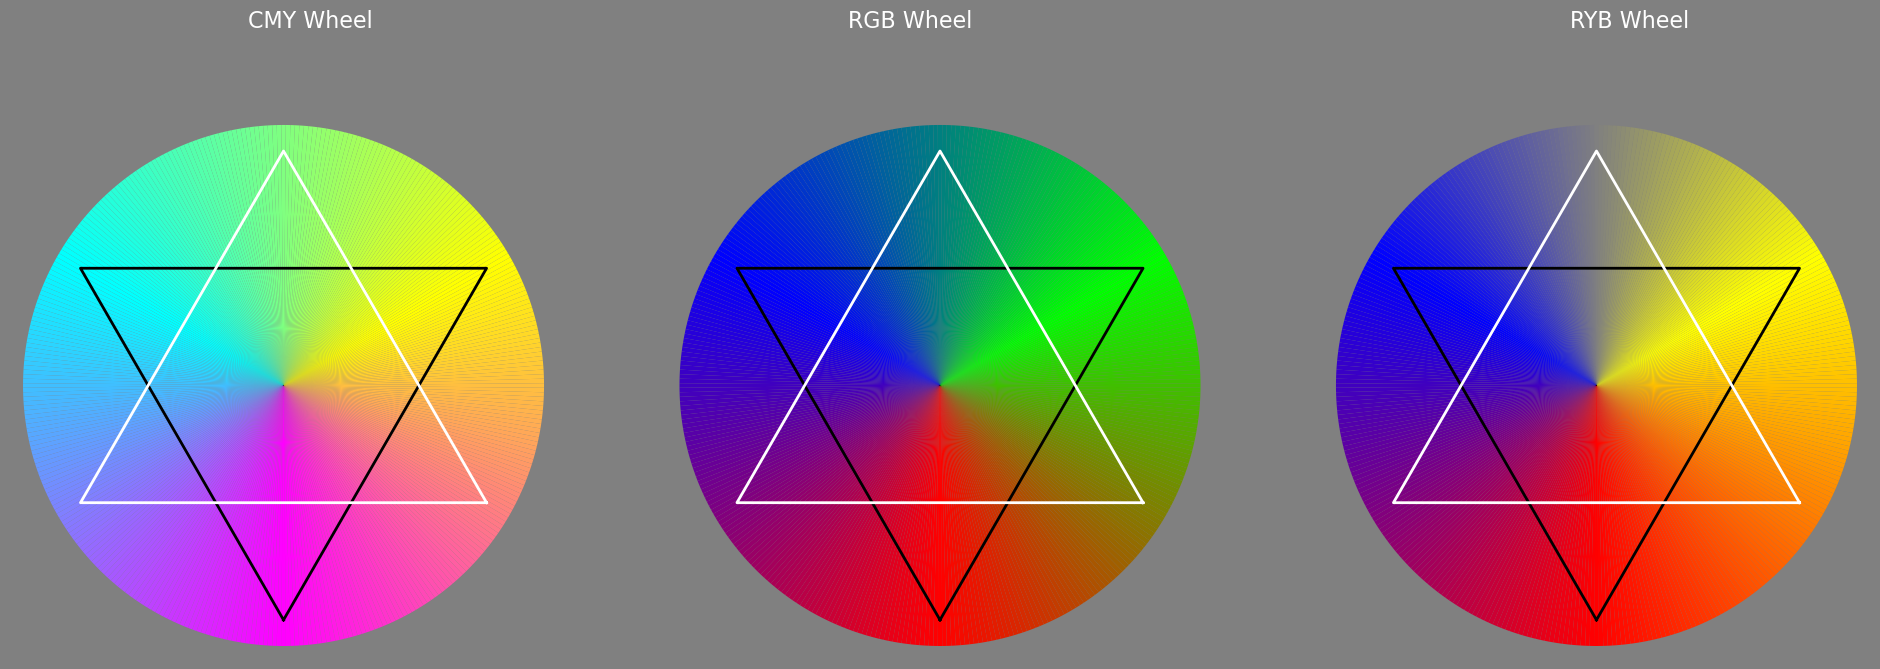

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Function to convert hex colors to RGB
def hex_to_rgb(hex_colors):
    return [np.array(mcolors.hex2color(color)) for color in hex_colors]

# Function to create a color wheel and overlay two triangles forming a hexagram
def create_color_wheel_with_hexagram(ax, hex_colors, n=120, offset=0):
    # Convert hex colors to RGB
    base_colors = hex_to_rgb(hex_colors)
    
    # Create an array of angles with the specified offset
    angles = np.linspace(0, 2 * np.pi, 3 * n, endpoint=False) + offset

    # Initialize the colors
    colors = np.zeros((3 * n, 3))

    # Create gradients between the base colors
    for i in range(n):
        colors[i] = base_colors[0] * (1 - i / n) + base_colors[1] * (i / n)
        colors[i + n] = base_colors[1] * (1 - i / n) + base_colors[2] * (i / n)
        colors[i + 2 * n] = base_colors[2] * (1 - i / n) + base_colors[0] * (i / n)

    # Normalize the angles for the color segments
    angles = np.concatenate((angles, [angles[0]]))
    colors = np.concatenate((colors, [colors[0]]))

    # Plot the color wheel
    ax.bar(angles, np.ones(3 * n + 1), color=colors, edgecolor='none', width=2 * np.pi / (3 * n))

    # Overlay the first triangle
    triangle_angles1 = np.array([0, 2 * np.pi / 3, 4 * np.pi / 3, 0]) + offset
    triangle_radii1 = [0.9, 0.9, 0.9, 0.9]
    ax.plot(triangle_angles1, triangle_radii1, color='black', linewidth=2)

    # Overlay the second triangle
    triangle_angles2 = np.array([np.pi / 3, np.pi, 5 * np.pi / 3, np.pi / 3]) + offset
    triangle_radii2 = [0.9, 0.9, 0.9, 0.9]
    ax.plot(triangle_angles2, triangle_radii2, color='white', linewidth=2)

    # Set the background color to 50% gray
    ax.set_facecolor('0.5')

    # Remove the frame and axis
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a figure with three subplots with 50% gray background
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), subplot_kw=dict(polar=True), facecolor='0.5')

# Hex colors for RGB, CMY (reversed), and RYB
rgb_colors = ['#FF0000', '#00FF00', '#0000FF']  # Red, Green, Blue
cmy_colors_reversed = ['#FF00FF', '#FFFF00', '#00FFFF']  # Magenta, Yellow, Cyan
ryb_colors = ['#FF0000', '#FFFF00', '#0000FF']  # Red, Yellow, Blue

# Create the color wheels with hexagrams
create_color_wheel_with_hexagram(ax1, cmy_colors_reversed, offset=-np.pi / 2)
create_color_wheel_with_hexagram(ax2, rgb_colors, offset=-np.pi / 2)
create_color_wheel_with_hexagram(ax3, ryb_colors, offset=-np.pi / 2)

# Add labels above each subplot
fig.text(0.25, 0.95, 'CMY Wheel', ha='center', va='center', fontsize=16, color='white')
fig.text(0.5, 0.95, 'RGB Wheel', ha='center', va='center', fontsize=16, color='white')
fig.text(0.80, 0.95, 'RYB Wheel', ha='center', va='center', fontsize=16, color='white')

# Display the combined color wheels
plt.show()


## Tints, Tones, Shades

Tints, Tones, and Shades are terms used to describe variations of a color based on the addition of white, gray, or black respectively. These variations are commonly used in art, design, and color theory to create harmonious color palettes and to adjust the lightness or darkness of a color.

### Tints

Tints are created by adding white to a color, resulting in a lighter version of the original color. Tints are often used to create pastel colors or to soften the intensity of a hue. For example, adding white to a pure red results in various shades of pink.

### Tones

Tones are created by adding gray to a color, resulting in a muted or desaturated version of the original color. Tones are useful for creating subtle variations in color and can help to harmonize different hues in a color palette. For example, adding gray to a pure blue results in various shades of slate blue.

### Shades

Shades are created by adding black to a color, resulting in a darker version of the original color. Shades are often used to create depth and contrast in a design or artwork. For example, adding black to a pure green results in various shades of forest green.

## Visualizing Tints, Tones, and Shades

The following code will take in an array of colors and generate a visualization of the tints, tones, and shades of each color.

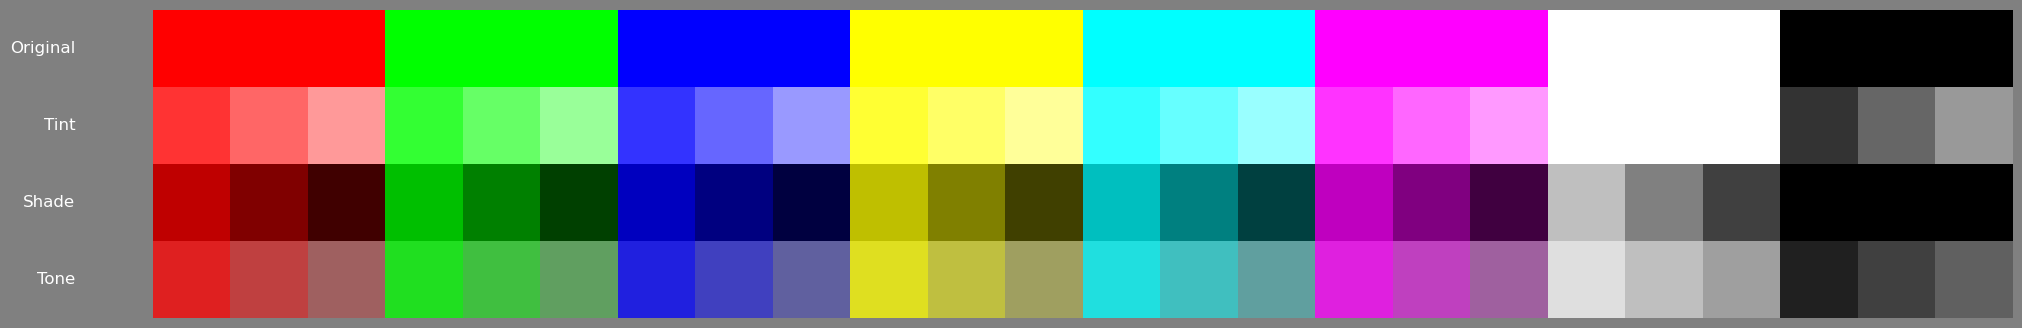

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Function to convert hex colors to RGB
def hex_to_rgb(hex_colors):
    return [np.array(mcolors.hex2color(color)) for color in hex_colors]

# Function to mix colors
def mix_colors(color1, color2, ratio):
    return color1 * (1 - ratio) + color2 * ratio

# Function to visualize the color scheme with tints, shades, and tones
def visualize_color_scheme_with_variations(colors):
    n = len(colors)
    rows = 4  # Original color, tint, shade, tone
    cols = 3  # 25%, 50%, 75% mixes

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(n * cols, 4), facecolor='0.5')

    # Remove the axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Create a grid of colors
    white = np.array([1, 1, 1])
    black = np.array([0, 0, 0])
    gray = np.array([0.5, 0.5, 0.5])
    for i, color in enumerate(colors):
        rgb_color = np.array(mcolors.hex2color(color))
        
        # Original color
        rect = plt.Rectangle((i * cols, 3), cols, 1, facecolor=color)
        ax.add_patch(rect)
        
        # Tints (25%, 50%, 75% white mix)
        for j, ratio in enumerate([0.20, 0.40, 0.60, 0.80]):
            tint = mix_colors(rgb_color, white, ratio)
            rect = plt.Rectangle((i * cols + j, 2), 1, 1, facecolor=tint)
            ax.add_patch(rect)
        
        # Shades (25%, 50%, 75% black mix)
        for j, ratio in enumerate([0.25, 0.5, 0.75]):
            shade = mix_colors(rgb_color, black, ratio)
            rect = plt.Rectangle((i * cols + j, 1), 1, 1, facecolor=shade)
            ax.add_patch(rect)
        
        # Tones (25%, 50%, 75% gray mix)
        for j, ratio in enumerate([0.25, 0.5, 0.75]):
            tone = mix_colors(rgb_color, gray, ratio)
            rect = plt.Rectangle((i * cols + j, 0), 1, 1, facecolor=tone)
            ax.add_patch(rect)
    
    # Set the limits of the plot
    ax.set_xlim(0, n * cols)
    ax.set_ylim(0, 4)

    # Add labels
    plt.text(-1, 3.5, 'Original', va='center', ha='right', fontsize=12, color='white')
    plt.text(-1, 2.5, 'Tint', va='center', ha='right', fontsize=12, color='white')
    plt.text(-1, 1.5, 'Shade', va='center', ha='right', fontsize=12, color='white')
    plt.text(-1, 0.5, 'Tone', va='center', ha='right', fontsize=12, color='white')
    
    plt.show()

# Example usage with an array of colors
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFFFFF', '#000000']
visualize_color_scheme_with_variations(colors)


## KMeans Clustering

KMeans clustering is an unsupervised machine learning algorithm that aims to partition a dataset into K distinct, non-overlapping clusters. The algorithm works iteratively to assign each data point to one of K clusters based on the features provided. The goal is to minimize the sum of squared distances between data points and their respective cluster centroids.

### Dominant Colors

In the context of color analysis, this algorithm can be used to group similar colors together based on their RGB values. By clustering colors, we can identify dominant color palettes in images, segment objects based on color similarity, or generate color-based recommendations.

The following code will first posterize an image to reduce the number of unique colors present, and then apply KMeans clustering to identify the dominant colors in the image.

> In addition, these dominant colors will be depicted with their respective tint, tone, and shade variations to provide a comprehensive view of the color palette.

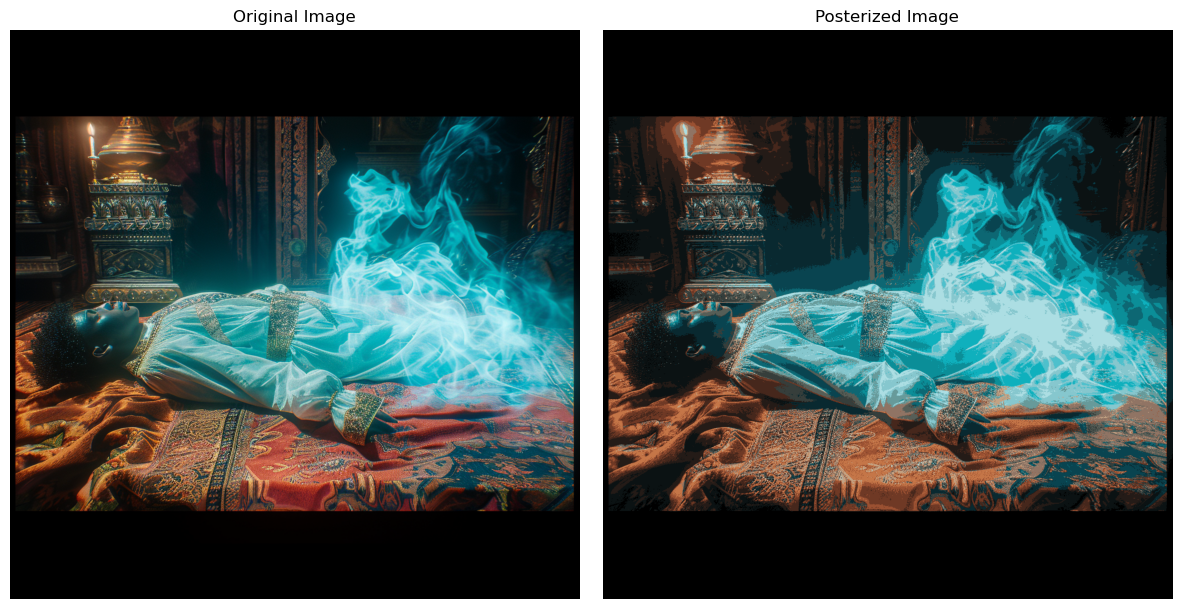

['#000000', '#0b1213', '#092930', '#241b17', '#094450', '#86c7ce', '#6f3925', '#46271c', '#363e3b', '#acdee3', '#0b8e98', '#565e57', '#0fb0bd', '#907464', '#9b5132', '#0d6773', '#c57648', '#4ec0cc', '#679a9a', '#c3a384']


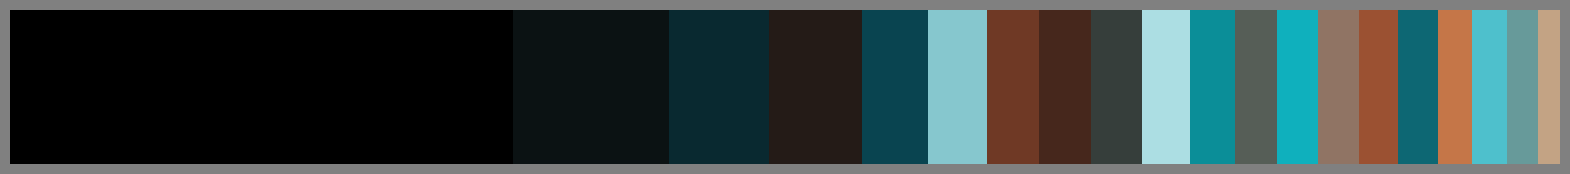

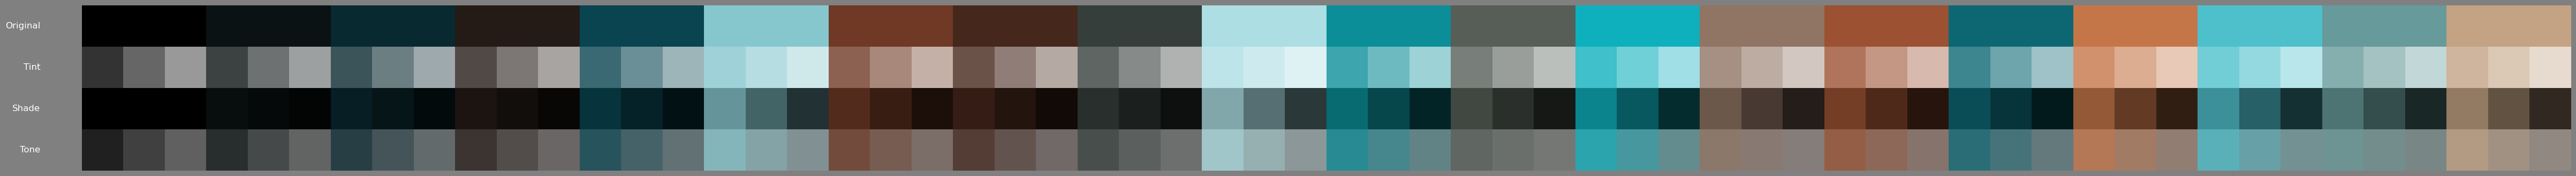

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np

# Load the image
image = Image.open(image_path)
image = image.convert('RGB')
image_np = np.array(image)

# Reshape the image to be a list of pixels
pixels = image_np.reshape(-1, 3)

# Use KMeans to find the most dominant colors for posterization
num_colors = 20
kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(pixels)

# Get the colors and labels from KMeans
colors = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a new image array with the posterized colors
posterized_image_np = colors[labels].reshape(image_np.shape).astype(np.uint8)

# Convert the posterized image array back to an image
posterized_image = Image.fromarray(posterized_image_np)

# Get the number of pixels for each color
counts = np.bincount(labels)

# Sort colors by the number of pixels (dominance)
sorted_indices = np.argsort(-counts)
sorted_colors = colors[sorted_indices]
sorted_counts = counts[sorted_indices]

# Normalize counts to get relative proportions
total_count = np.sum(sorted_counts)
proportions = sorted_counts / total_count

# Convert colors to hex
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

sorted_colors_hex = [rgb_to_hex(color) for color in sorted_colors]

# Function to visualize the sorted color swatches with proportions
def visualize_sorted_colors(colors_hex, proportions):
    n = len(colors_hex)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(n, 2), facecolor='0.5')
    
    # Remove the axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    # Create a grid of colors with varying widths based on proportions
    current_x = 0
    for i, (color, proportion) in enumerate(zip(colors_hex, proportions)):
        width = proportion * n  # Adjust width relative to the total number of colors
        rect = plt.Rectangle((current_x, 0), width, 1, facecolor=color)
        ax.add_patch(rect)
        current_x += width
    
    # Set the limits of the plot
    ax.set_xlim(0, n)
    ax.set_ylim(0, 1)
    
    plt.show()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image on the left subplot
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Original Image')

# Display the posterized image on the right subplot
axes[1].imshow(posterized_image)
axes[1].axis('off')
axes[1].set_title('Posterized Image')

# Adjust the layout
plt.tight_layout()
plt.show()

# Return the array of sorted colors
print(sorted_colors_hex)

# Visualize the sorted colors with proportions
visualize_sorted_colors(sorted_colors_hex, proportions)

# Render the sorted colors with variations
visualize_color_scheme_with_variations(sorted_colors_hex)
